In [1]:
import numpy as np
from scipy import linalg as LA
from matplotlib import pyplot as plt

In [2]:
# importing the matrix
T = np.load('AdjacencyMatrix_N=10_max(SV)=0.933745180396509.npy')
N = T.shape[0]

In [3]:
#print(LA.eigvals(T))
l, V = LA.eig(T)

In [21]:
# setting up the time line & time-steps (independent variable)
dt = 0.001
tmax = 20
tlist = np.arange (0, tmax, dt)
nt = tlist.size 

In [30]:
# input signal 
A = np.zeros(N)
#A[3] = 0.03
A[2] = 15.0

FR = np.zeros(N)
FR[2]= 40.0

PHI = np.zeros(N)
#PHI[3] = np.pi / 2
PHI[2] = 5.0

t1 = 1.2 # Input's starttime
t2 = 5.0 # Input's endtime
ti_1 = int(t1 / dt)
ti_2 = int(t2 / dt)
U = np.zeros((N,nt))
for i in range(N):
    U [i,ti_1:ti_2] = A[i] * np.sin(FR[i] * tlist[ti_1:ti_2] + PHI[i])

In [31]:
# initializing the vector field

F = np.zeros((N,nt)) 

In [32]:
# initiating the state vector (dependent variable)
X = np.zeros((N,nt))
X_intr = np.zeros((N,nt))
print(X[:,0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [33]:
# integrating, the Heun method
for i in range(1,nt):
    F[:,i-1] = T @ X[:,i-1] + U[:,i-1] 
    X_intr[:,i] = X[:,i-1] + dt * F[:,i-1]  
    F[:,i] = T @ X_intr[:,i] + U[:,i]
    X[:,i] = X[:,i-1] + dt * (F[:,i-1] + F[:,i]) / 2

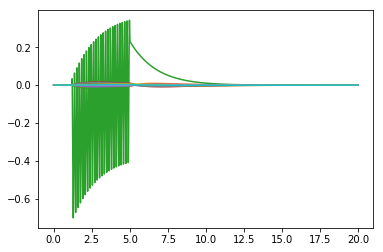

In [34]:
#Visualizations
for i in range(N):
    plt.plot(tlist,X[i,:])
#plt.show()

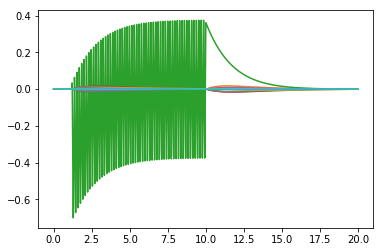

In [41]:
t1 = 1.2 # Input's starttime
t2 = 10.0 # Input's endtime
ti_1 = int(t1 / dt)
ti_2 = int(t2 / dt)
U = np.zeros((N,nt))
F = np.zeros((N,nt)) 

X = np.zeros((N,nt))
X_intr = np.zeros((N,nt))


for i in range(N):
    U [i,ti_1:ti_2] = A[i] * np.sin(FR[i] * tlist[ti_1:ti_2] + PHI[i])

#for i in range(N):
#    U[i,ti_1:ti_2] = A[i] * np.exp(tlist[ti_1:ti_2])
    
for i in range(1,nt):
    F[:,i-1] = T @ X[:,i-1] + U[:,i-1] 
    X_intr[:,i] = X[:,i-1] + dt * F[:,i-1]  
    F[:,i] = T @ X_intr[:,i] + U[:,i]
    X[:,i] = X[:,i-1] + dt * (F[:,i-1] + F[:,i]) / 2

for i in range(N):
    plt.plot(tlist,X[i,:])
#plt.show()
